### Steps
* Exploratory Data Analysis
* Cleaning and Preprocessing
* Feature Engineering
* Model Building

In [63]:
# import libraries

# For loading Packages
import pandas as pd
pd.set_option('max_columns', None)
pd.set_option('max_rows', 100)

# For mathematical calculations
import numpy as np

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To build and evaluate model
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score

# To ignore any warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# store data in dataframe
train_data = pd.read_csv("train_loan_prediction.csv")
test_data = pd.read_csv("test_loan_prediction.csv")

In [3]:
# view first 5 rows of the train data
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# view first 5 rows of the test data
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


#### Exploartory Data Analysis

In [5]:
# print shape of the train dataset
train_data.shape

(614, 13)

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


##### Univariate Analysis

<AxesSubplot:title={'center':'Loan Status'}>

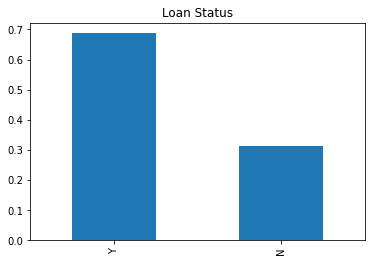

In [7]:
# Visualize Target Variable (i.e Loan status)
train_data['Loan_Status'].value_counts(normalize = True).plot.bar(title = "Loan Status")

It can be inferred from the bar plot that 60% of the train set were granted loan and 30% were not

<AxesSubplot:title={'center':'Credit_History'}>

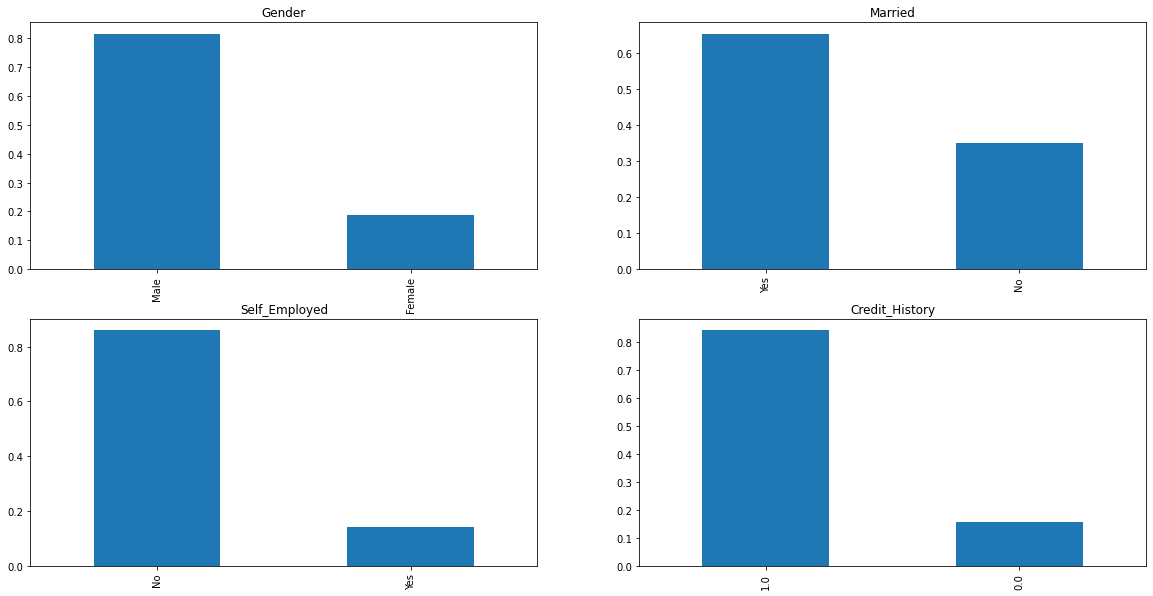

In [8]:
# Visualize independent categorical features
plt.figure(1) 
plt.subplot(221)
train_data['Gender'].value_counts(normalize = True).plot.bar(figsize = (20, 10), title = 'Gender')
plt.subplot(222)
train_data['Married'].value_counts(normalize = True).plot.bar(title = 'Married')
plt.subplot(223)
train_data['Self_Employed'].value_counts(normalize = True).plot.bar(title = 'Self_Employed')
plt.subplot(224)
train_data['Credit_History'].value_counts(normalize = True).plot.bar(title = 'Credit_History')

It can be inferred from the above bar plots that:
* 80% of the applicants of train dataset are male
* About 65% of the applicants are married
* About 15% of the applicants in the train dataset are self-employed
* About 85% of the applicants in the train dataset have repaid their debts

<AxesSubplot:title={'center':'Property_Area'}>

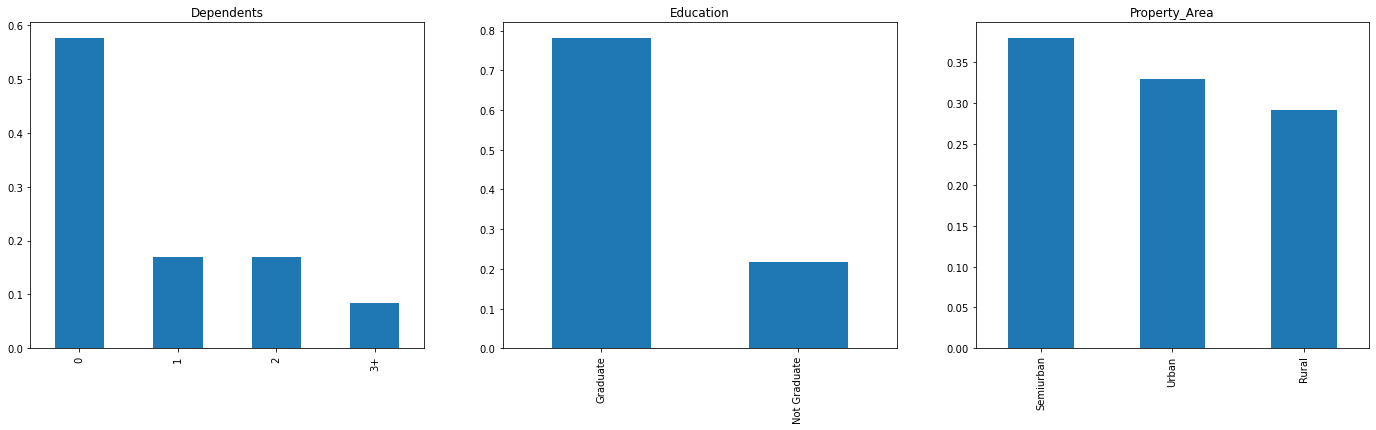

In [9]:
# Visualize independent ordinal features
plt.figure(1) 
plt.subplot(131)
train_data['Dependents'].value_counts(normalize = True).plot.bar(figsize = (24, 6), title = 'Dependents')
plt.subplot(132)
train_data['Education'].value_counts(normalize = True).plot.bar(title = 'Education')
plt.subplot(133)
train_data['Property_Area'].value_counts(normalize = True).plot.bar(title = 'Property_Area')

It can be inferred from the bar plot above that:
* Most of the applicants in the train dataset don't have any dependents
* About 78% of the applicants in the train dataset are graduates
* Most applicants in the train dataset are from the Semiurban area

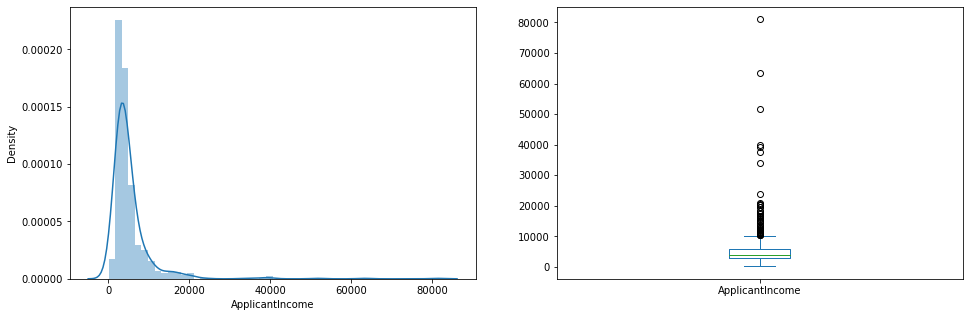

In [10]:
# Visualize independent numerical features distribution (ApplicantIncome)
plt.figure(1)
plt.subplot(121)
sns.distplot(train_data['ApplicantIncome']);
plt.subplot(122)
train_data['ApplicantIncome'].plot.box(figsize = (16, 5));
plt.show()

It can be seen from the distplot plot above that the ApplicantIncome column is left skewed and the boxplot confirms the presence of a lot of outliers

Text(0.5, 0.98, '')

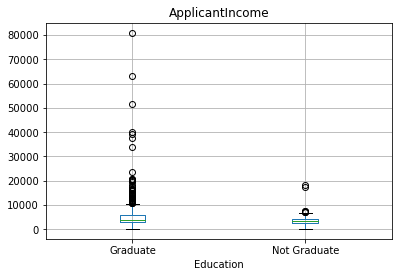

In [11]:
# Segregate ApplicantIncome by Education
train_data.boxplot(column = 'ApplicantIncome', by = 'Education')
plt.suptitle("")

It can be seen that there are a higher number of graduates with very high incomes, which are the outliers.

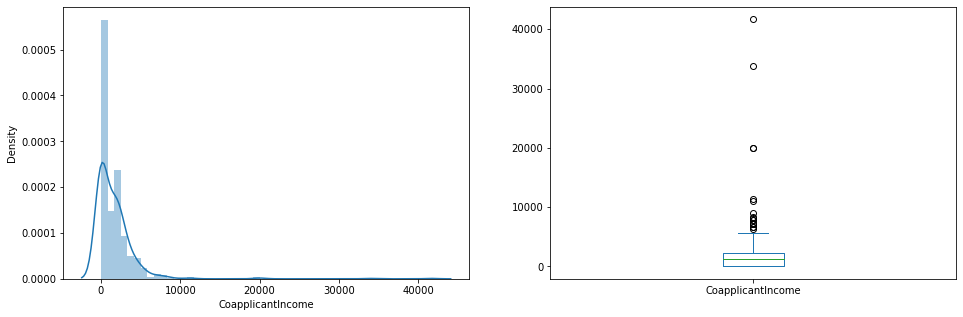

In [12]:
# Visualize independent numerical features distribution (CoapplicantIncome)
plt.figure(1)
plt.subplot(121)
sns.distplot(train_data['CoapplicantIncome']);
plt.subplot(122)
train_data['CoapplicantIncome'].plot.box(figsize = (16, 5));
plt.show()

It can be seen that the CoapplicantIncome column is also left skewed and the boxplot also the confirms presence of outliers

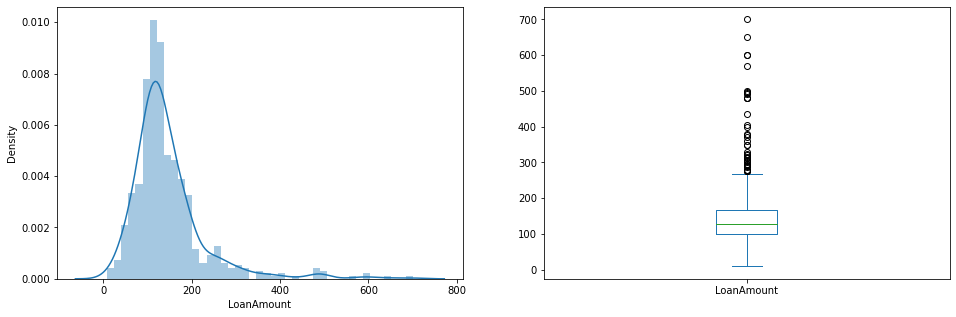

In [13]:
# Visualize independent numerical features distribution (LoanAmount)
plt.figure(1)
plt.subplot(121)
sns.distplot(train_data['LoanAmount']);
plt.subplot(122)
train_data['LoanAmount'].plot.box(figsize = (16, 5));
plt.show()

The distribution of LoanAmount is fairly normal but there the variable has a lot of outliers. 

##### Bivariate Analysis

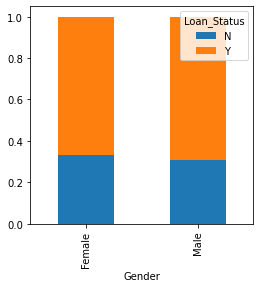

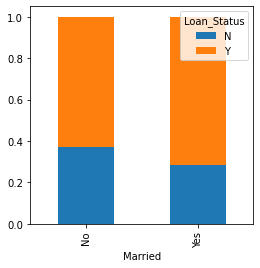

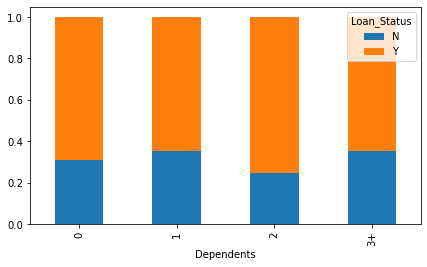

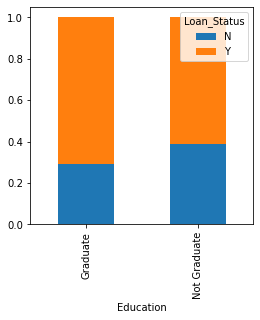

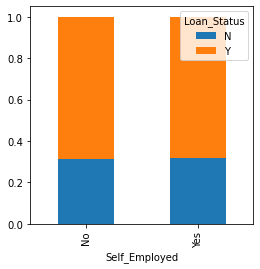

In [14]:
# Categorical Independent varible vs target variable
Gender = pd.crosstab(train_data["Gender"], train_data["Loan_Status"])
Married = pd.crosstab(train_data["Married"], train_data["Loan_Status"])
Dependents = pd.crosstab(train_data["Dependents"], train_data["Loan_Status"])
Education = pd.crosstab(train_data["Education"], train_data["Loan_Status"])
Self_Employed = pd.crosstab(train_data["Self_Employed"], train_data["Loan_Status"])

Gender.div(Gender.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True, figsize = (4, 4))
plt.show()
Married.div(Married.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True, figsize = (4, 4))
plt.show()
Dependents.div(Dependents.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True, figsize = (7, 4))
plt.show()
Education.div(Education.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True, figsize = (4, 4))
plt.show()
Self_Employed.div(Self_Employed.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True, figsize = (4, 4))
plt.show()

It can be inferred that:
* the population of male and female that were granted loan in the train dataset are fairly the same
* the proportion of married applicants that were granted loan in the train dataset is more than that of the unmarried applicants
* the distribution of applicants with 1 or 3+ dependents is similar across both categories of Loan_Status
* the proportion of graduate applicants that were granted loan in the train dataset is more than that of the not graduate applicants
* there is no difference in the proportion of self-employed applicants granted loan in the train dataset is the same as that of those that are not self-employed

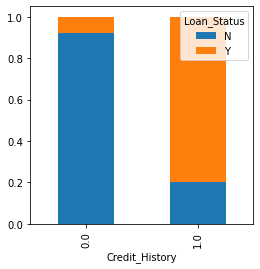

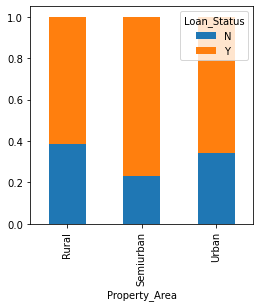

In [15]:
# Categorical Independent varible vs target variable
Credit_History = pd.crosstab(train_data["Credit_History"], train_data["Loan_Status"])
Property_Area = pd.crosstab(train_data["Property_Area"], train_data["Loan_Status"])

Credit_History.div(Credit_History.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True, figsize = (4, 4))
plt.show()
Property_Area.div(Property_Area.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True, figsize = (4, 4))
plt.show()

It can be inferred from the plot that:
* the applicants with credit history as 1 are more likely to be granted loans
* the proportion of loans approved in semiurban areas is higher compared to that in rural and urban areas

<AxesSubplot:xlabel='Loan_Status'>

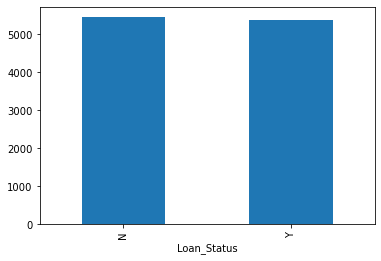

In [16]:
# ApplicantIncome vs Loan Status
train_data.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

Text(0, 0.5, 'Percentage')

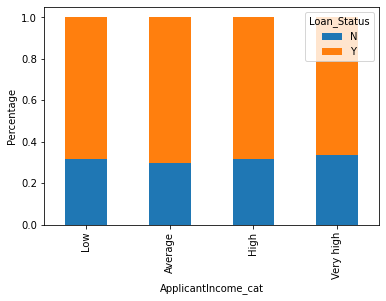

In [17]:
train_data['ApplicantIncome_cat'] = pd.cut(train_data['ApplicantIncome'], bins = [-1, 2500, 4000, 6000, 100000], labels = ['Low', 'Average', 'High', 'Very high'])
Income_cat = pd.crosstab(train_data['ApplicantIncome_cat'], train_data['Loan_Status'])
Income_cat.div(Income_cat.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True)
plt.xlabel('ApplicantIncome_cat')
plt.ylabel('Percentage')

It can be inferred from plot above that ApplicantIncome does not really have an effect on Loan Status

Text(0, 0.5, 'Percentage')

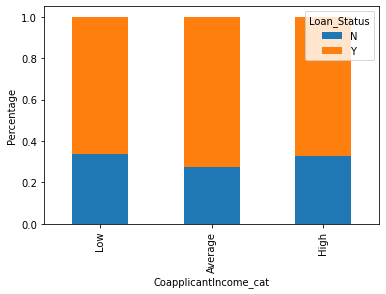

In [18]:
train_data['Coapplicant_Income_cat'] = pd.cut(train_data['CoapplicantIncome'], bins = [-1, 1000, 3000, 100000], labels = ['Low', 'Average', 'High'])
Coapplicant_Income_bin = pd.crosstab(train_data['Coapplicant_Income_cat'], train_data['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True)
plt.xlabel('CoapplicantIncome_cat')
plt.ylabel('Percentage')

From the plot it looks like average income applicants have lower chances of loan approval

Text(0, 0.5, 'Percentage')

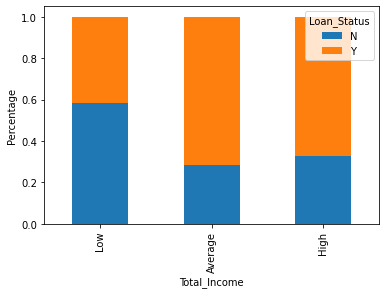

In [19]:
# Combine the Applicant Income and Coapplicant Income and see the combined effect of Total Income on the Loan Status
train_data['Total_Income'] = train_data['ApplicantIncome'] + train_data['CoapplicantIncome']
train_data['Total_Income_bin'] = pd.cut(train_data['Total_Income'], bins = [-1, 2500, 6000, 100000], labels = ['Low', 'Average', 'High'])

Total_Income_bin = pd.crosstab(train_data['Total_Income_bin'], train_data['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True)
plt.xlabel("Total_Income")
plt.ylabel("Percentage")

From the plot above it can be inferred that the average and higher income applicant have a higher chance of Loan Approval

Text(0, 0.5, 'Percentage')

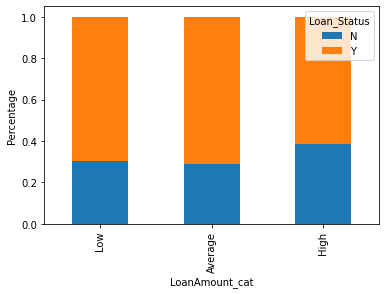

In [20]:
train_data['LoanAmount_cat'] = pd.cut(train_data['LoanAmount'], bins = [0, 100, 200, 1000], labels = ['Low', 'Average', 'High'])
LoanAmount_bin = pd.crosstab(train_data['LoanAmount_cat'], train_data['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True)
plt.xlabel('LoanAmount_cat')
plt.ylabel('Percentage')

It can be inferred that higher the loan amount the lesser the chance of Loan Approval

#### Cleaning and Preprocessing

In [21]:
# Combine train and test data to make cleaning and preprocessing easier
target = train_data["Loan_Status"]
test_id = test_data["Loan_ID"]

train_data_1 = train_data.drop(["Loan_ID", "Loan_Status"], axis = 1)
test_data_1 = test_data.drop("Loan_ID", axis = 1)

data = pd.concat([train_data_1, test_data_1], axis = 0).reset_index(drop = True)

In [22]:
# view first 5 rows of data
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,ApplicantIncome_cat,Coapplicant_Income_cat,Total_Income,Total_Income_bin,LoanAmount_cat
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,High,Low,5849.0,Average,NaN
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,High,Average,6091.0,High,Average
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Average,Low,3000.0,Average,Low
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Average,Average,4941.0,Average,Average
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,High,Low,6000.0,Average,Average


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Gender                  957 non-null    object  
 1   Married                 978 non-null    object  
 2   Dependents              956 non-null    object  
 3   Education               981 non-null    object  
 4   Self_Employed           926 non-null    object  
 5   ApplicantIncome         981 non-null    int64   
 6   CoapplicantIncome       981 non-null    float64 
 7   LoanAmount              954 non-null    float64 
 8   Loan_Amount_Term        961 non-null    float64 
 9   Credit_History          902 non-null    float64 
 10  Property_Area           981 non-null    object  
 11  ApplicantIncome_cat     614 non-null    category
 12  Coapplicant_Income_cat  614 non-null    category
 13  Total_Income            614 non-null    float64 
 14  Total_Income_bin        61

In [24]:
# get categorical columns with null values in the train dataset
data_1 = data.copy()
missing_cat_cols = list(data_1.select_dtypes(['object', 'category']).loc[:, data_1.isna().sum() > 0].columns)
missing_cat_cols

['Gender',
 'Married',
 'Dependents',
 'Self_Employed',
 'ApplicantIncome_cat',
 'Coapplicant_Income_cat',
 'Total_Income_bin',
 'LoanAmount_cat']

In [25]:
data_1[missing_cat_cols].isna().sum()

Gender                     24
Married                     3
Dependents                 25
Self_Employed              55
ApplicantIncome_cat       367
Coapplicant_Income_cat    367
Total_Income_bin          367
LoanAmount_cat            389
dtype: int64

In [26]:
# Fill Categorical missing values with mode
for column in missing_cat_cols:
    data_1[column] = data_1[column].fillna(data_1[column].mode()[0])

In [27]:
missing_num_cols = list(data_1.select_dtypes(np.number).loc[:, data_1.isna().sum() > 0].columns)
missing_num_cols

['LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Total_Income']

In [28]:
data_1[missing_num_cols].isna().sum()

LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Total_Income        367
dtype: int64

In [29]:
data_1[missing_num_cols].describe()

,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income
count,954.000000,961.000000,902.000000,614.000000
mean,142.511530,342.201873,0.835920,7024.705081
std,77.421743,65.100602,0.370553,6458.663872
min,9.000000,6.000000,0.000000,1442.000000
25%,100.000000,360.000000,1.000000,4166.000000
50%,126.000000,360.000000,1.000000,5416.500000
75%,162.000000,360.000000,1.000000,7521.750000
max,700.000000,480.000000,1.000000,81000.000000


In [30]:
# Fill missing numeric values with median
for column in missing_num_cols:
    data_1[column] = data_1[column].fillna(data_1[column].median())

In [31]:
data_1.isna().sum()

Gender                    0
Married                   0
Dependents                0
Education                 0
Self_Employed             0
ApplicantIncome           0
CoapplicantIncome         0
LoanAmount                0
Loan_Amount_Term          0
Credit_History            0
Property_Area             0
ApplicantIncome_cat       0
Coapplicant_Income_cat    0
Total_Income              0
Total_Income_bin          0
LoanAmount_cat            0
dtype: int64

#### Preprocessing

In [32]:
data_2 = data_1.copy()

In [33]:
data_2['Dependents'].replace('3+', 3, inplace = True)

In [34]:
data_2.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,ApplicantIncome_cat,Coapplicant_Income_cat,Total_Income,Total_Income_bin,LoanAmount_cat
0,Male,No,0,Graduate,No,5849,0.0,126.0,360.0,1.0,Urban,High,Low,5849.0,Average,Average
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,High,Average,6091.0,High,Average
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Average,Low,3000.0,Average,Low
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Average,Average,4941.0,Average,Average
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,High,Low,6000.0,Average,Average


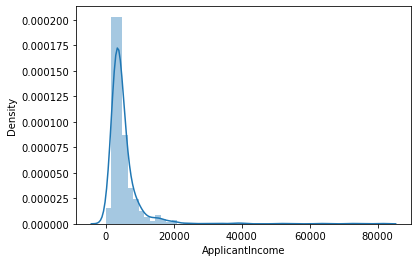

In [35]:
sns.distplot(data_2['ApplicantIncome']);

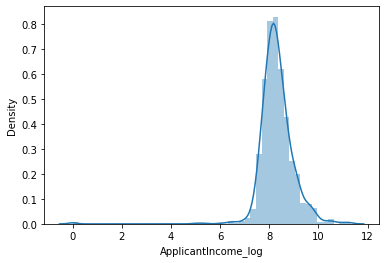

In [36]:
# take the log transformation to make the distribution normal
data_2['ApplicantIncome_log'] = np.log1p(data_2['ApplicantIncome'])
sns.distplot(data_2['ApplicantIncome_log']);

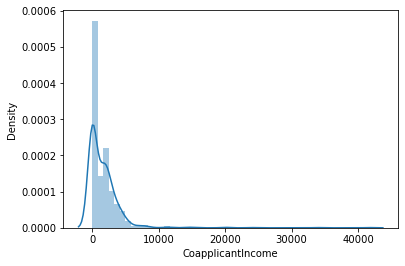

In [37]:
sns.distplot(data_2['CoapplicantIncome']);

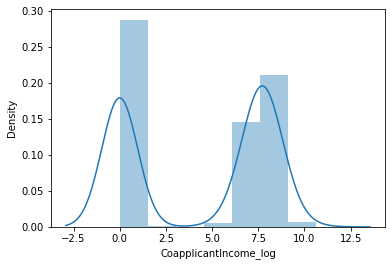

In [38]:
# take the log transformation to make the distribution normal
data_2['CoapplicantIncome_log'] = np.log1p(data_2['CoapplicantIncome'])
sns.distplot(data_2['CoapplicantIncome_log']);

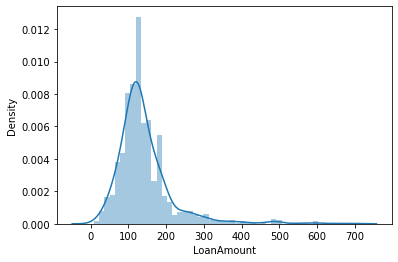

In [39]:
sns.distplot(data_2['LoanAmount']);

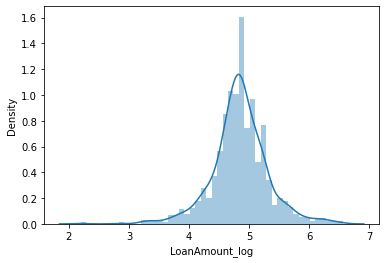

In [40]:
# take the log transformation to make the distribution normal
data_2['LoanAmount_log'] = np.log(data_2['LoanAmount'])
sns.distplot(data_2['LoanAmount_log']);

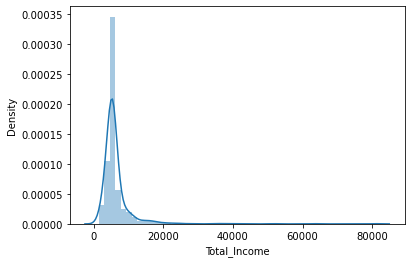

In [41]:
sns.distplot(data_2['Total_Income']);

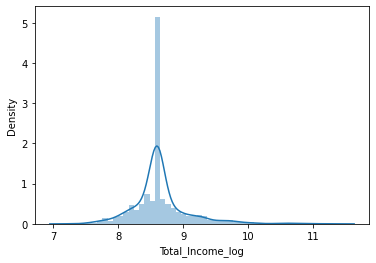

In [42]:
# take the log transformation to make the distribution normal
data_2['Total_Income_log'] = np.log(data_2['Total_Income'])
sns.distplot(data_2['Total_Income_log']);

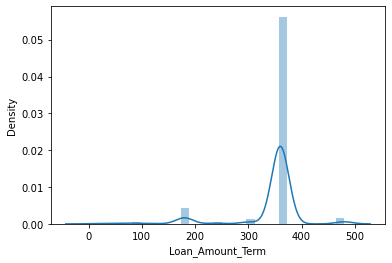

In [43]:
sns.distplot(data_2['Loan_Amount_Term']);

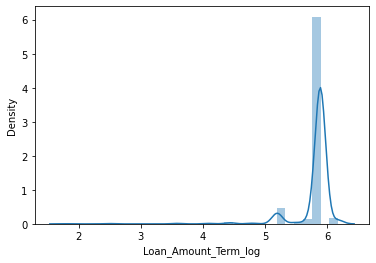

In [44]:
# take the log transformation to make the distribution normal
data_2['Loan_Amount_Term_log'] = np.log(data_2['Loan_Amount_Term'])
sns.distplot(data_2['Loan_Amount_Term_log']);

In [45]:
data_3 = data_2.copy()
data_3 = data_3.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount', 'Total_Income', 'Loan_Amount_Term'], axis = 1)

In [46]:
data_3.head(3)

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncome_cat,Coapplicant_Income_cat,Total_Income_bin,LoanAmount_cat,ApplicantIncome_log,CoapplicantIncome_log,LoanAmount_log,Total_Income_log,Loan_Amount_Term_log
0,Male,No,0,Graduate,No,1.0,Urban,High,Low,Average,Average,8.674197,0.000000,4.836282,8.674026,5.886104
1,Male,Yes,1,Graduate,No,1.0,Rural,High,Average,High,Average,8.430327,7.319202,4.852030,8.714568,5.886104
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Average,Low,Average,Low,8.006701,0.000000,4.189655,8.006368,5.886104


In [47]:
# # Categorical Encoding
# data_3 = pd.get_dummies(data_3, columns = ['Gender', 'Married', 'Self_Employed'])

# Ordinal Encoding
for col in ['Education', 'Property_Area', 'ApplicantIncome_cat', 'Coapplicant_Income_cat', 'Total_Income_bin', 'LoanAmount_cat']:
    data_3[col], _ = data_3[col].factorize()

In [48]:
# Categorical Encoding
data_3 = pd.get_dummies(data_3, columns = ['Gender', 'Married', 'Self_Employed'])

In [49]:
data_3.head(3)

,Dependents,Education,Credit_History,Property_Area,ApplicantIncome_cat,Coapplicant_Income_cat,Total_Income_bin,LoanAmount_cat,ApplicantIncome_log,CoapplicantIncome_log,LoanAmount_log,Total_Income_log,Loan_Amount_Term_log,Gender_Female,Gender_Male,Married_No,Married_Yes,Self_Employed_No,Self_Employed_Yes
0,0,0,1.0,0,0,0,0,0,8.674197,0.000000,4.836282,8.674026,5.886104,0,1,1,0,1,0
1,1,0,1.0,1,0,1,1,0,8.430327,7.319202,4.852030,8.714568,5.886104,0,1,0,1,1,0
2,0,0,1.0,0,1,0,0,1,8.006701,0.000000,4.189655,8.006368,5.886104,0,1,0,1,0,1


#### Feature Engineering

In [50]:
data_4 = data_3.copy()

In [51]:
# Create EMI (monthly amount to be repaid by applicants) column
data_4['EMI_log'] = data_2['LoanAmount_log'] / data_2['Loan_Amount_Term_log']

In [52]:
data_4['EMI_log']

0      0.821644
1      0.824319
2      0.711787
3      0.813355
4      0.840753
         ...   
976    0.803144
977    0.806124
978    0.821644
979    0.860093
980    0.882920
Name: EMI_log, Length: 981, dtype: float64

In [53]:
# Create balance income(applicants income left after loan has been repaid) column
data_4['BalanceIncome_log'] = data_4['Total_Income_log'] - (data_4['EMI_log']) # Multiply by 100 to make the units equal

In [54]:
# data_4 = data_4.drop(['ApplicantIncome_log', 'CoapplicantIncome_log', 'Loan_Amount_Term'], axis = 1)

In [55]:
data_4.head(3)

,Dependents,Education,Credit_History,Property_Area,ApplicantIncome_cat,Coapplicant_Income_cat,Total_Income_bin,LoanAmount_cat,ApplicantIncome_log,CoapplicantIncome_log,LoanAmount_log,Total_Income_log,Loan_Amount_Term_log,Gender_Female,Gender_Male,Married_No,Married_Yes,Self_Employed_No,Self_Employed_Yes,EMI_log,BalanceIncome_log
0,0,0,1.0,0,0,0,0,0,8.674197,0.000000,4.836282,8.674026,5.886104,0,1,1,0,1,0,0.821644,7.852382
1,1,0,1.0,1,0,1,1,0,8.430327,7.319202,4.852030,8.714568,5.886104,0,1,0,1,1,0,0.824319,7.890248
2,0,0,1.0,0,1,0,0,1,8.006701,0.000000,4.189655,8.006368,5.886104,0,1,0,1,0,1,0.711787,7.294580


In [56]:
# split the data back to get the train and test data
data_5 = data_4.copy()
train_data_final = data_5.loc[:train_data.index.max(),  :].copy()
test_data_final = data_5.loc[train_data.index.max() + 1:, :].reset_index(drop = True).copy()

In [57]:
# print shape of final train data
print(train_data_final.shape)

# print shape of final train data
print(test_data_final.shape)

(614, 21)
(367, 21)


In [58]:
X = train_data_final.copy()

# save target variable in in y
y = target

In [59]:
# baseline model
baseline_model = RandomForestClassifier(random_state = 1)
baseline_model.fit(X, y)

RandomForestClassifier(random_state=1)

In [60]:
# store accuracy of baseline model prediction in results
result = cross_val_score(baseline_model, X, y, cv = 20, scoring = "accuracy")

In [61]:
# print mean and standard deviation of baseline model
print(np.mean(result))
print(np.std(result))

0.7901075268817205
0.060052199130577605


In [64]:
# provide range for max_depth from 1 to 20 with an interval of 2 
# provide range for n_estimators from 1 to 200 with an interval of 20
paramgrid = {'max_depth': list(range(1, 20, 2)), 
             'n_estimators': list(range(1, 200, 20))}
grid_search = GridSearchCV(RandomForestClassifier(random_state = 1), paramgrid)

# fit the grid search model
grid_search.fit(X, y)

# Estimating the optimized value
grid_search.best_estimator_

RandomForestClassifier(max_depth=5, n_estimators=21, random_state=1)

In [65]:
# build final model with these optimized values 
model_final = RandomForestClassifier(max_depth=5, n_estimators=21, random_state=1)

# fit model on X and y
model_final.fit(X, y)

RandomForestClassifier(max_depth=5, n_estimators=21, random_state=1)

In [66]:
# store accuracy of each final model's prediction in result
result_final = cross_val_score(model_final, X, y, cv = 20, scoring = "accuracy")

In [67]:
# print mean and standard deviation of the accuracy of the final model

print(np.mean(result_final))
print(np.std(result_final))

0.8064516129032258
0.0487667305739098


In [68]:
# use final model to predict on the test data and store predictions in prediction 
prediction = model_final.predict(test_data_final)

In [69]:
prediction

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y